In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(_img):
    img = _img.copy().astype(np.float)
    r = img[..., 2].copy()
    g = img[..., 1].copy()
    b = img[..., 0].copy()
    img = 0.2126 * r + 0.7152 * g + 0.0722 * b
    img = img.astype(np.uint8)
    return img

In [3]:
def otsu_binarization(img):
    img = rgb2gray(img)
    out = img.copy()
    max_sigma = 0
    max_t = 0
    H, W = img.shape
    for _t in range(1, 256):
        v0 = out[np.where(out < _t)]
        m0 = np.mean(v0) if len(v0) > 0 else 0.
        w0 = len(v0) / (H * W)
        v1 = out[np.where(out >= _t)]
        m1 = np.mean(v1) if len(v1) > 0 else 0.
        w1 = len(v1) / (H * W)
        sigma = w0 * w1 * ((m0 - m1) ** 2)
        if sigma > max_sigma:
            max_sigma = sigma
            max_t = _t

    print("threshold >>", max_t)
    th = max_t
    out[out < th] = 0
    out[out >= th] = 255

    return out

In [4]:
def dilate(img):
    out = img.copy()
    k = np.array(((0,1,0), (1,0,1), (0,1,0)), dtype=np.int)
    
    h, w = img.shape
    for i in range(1, h-1):
        for j in range(1, w-1):
            if img[i, j] == 0 and np.sum(img[i-1:i+2, j-1:j+2] * k) >= 255:
                out[i, j] = 255
                
    return out


def erosion(img):
    out = img.copy()
    k = np.array(((0,1,0), (1,0,1), (0,1,0)), dtype=np.int)
    
    h, w = img.shape
    for i in range(1, h-1):
        for j in range(1, w-1):
            if img[i, j] == 255 and np.sum(img[i-1:i+2, j-1:j+2] * k) < 255*4:
                out[i, j] = 0
                
    return out


def opening(img, n=1):
    e = erosion(img)
    if n > 1:
        for i in range(n-1):
            e = erosion(e)
    d = dilate(e)
    if n > 1:
        for i in range(n-1):
            d = erosion(d)
    return d


def closing(img, n=1):
    d = dilate(img)
    if n > 1:
        for i in range(n-1):
            d = dilate(d)
    e = erosion(d)
    if n > 1:
        for i in range(n-1):
            e = erosion(e)
    return e

threshold >> 130


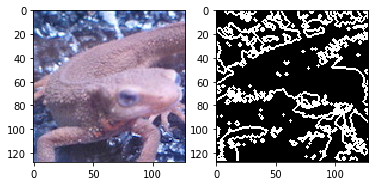

In [5]:
#51
def morphology_gradient(img, n=1):
    d = dilate(img)
    e = erosion(img)
    out = img.copy()
    out = np.abs(d - e)
    return out

img = cv2.imread('imori.jpg')
img = img[..., ::-1]

bi = otsu_binarization(img)
out = morphology_gradient(bi)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.show()

threshold >> 130


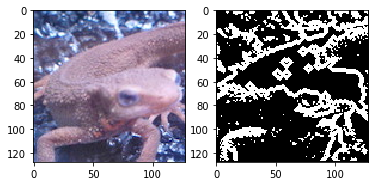

In [6]:
#52
def tophat(img, n=3):
    op = opening(img, n)
    out = img.copy()
    out = np.abs(img - op)
    return out


img = cv2.imread('imori.jpg')
img = img[..., ::-1]

bi = otsu_binarization(img)
out = tophat(bi)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.show()

threshold >> 130


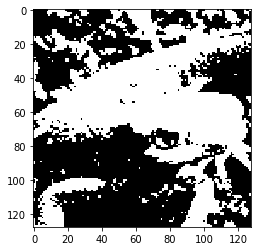

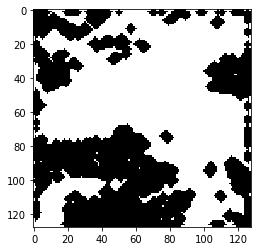

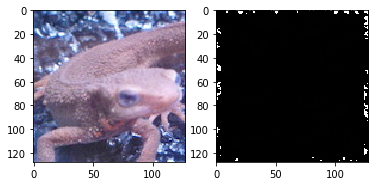

In [7]:
#53
def blackhat(img, n=3):
    cl = closing(img, n)
    plt.imshow(img, cmap='gray')
    plt.show()
    plt.imshow(cl, cmap='gray')
    plt.show()
    out = img.copy()
    out = np.abs(img - cl)
    return out


img = cv2.imread('imori.jpg')
img = img[..., ::-1]

bi = otsu_binarization(img)
out = blackhat(bi)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.show()

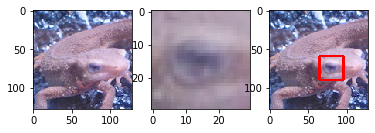

In [30]:
#54
def ssd(img, tmp):
    img = img.astype(np.float32)
    tmp = tmp.astype(np.float32)
    H, W, C = img.shape
    h, w, c = tmp.shape
    s_min = h * w * c * 255**2
    y, x = -1, -1
    for i in range(H-h+1):
        for j in range(W-w+1):
            s = np.sum((img[i:i+h, j:j+w]-tmp)**2)
            if s < s_min:
                s_min = s
                y, x = i, j
    
    out = img.copy()
    cv2.rectangle(out, (x, y), (x+w+1, y+h+1), (255, 0, 0), 2)
    out = out.astype(np.uint8)
    return out

img = cv2.imread('imori.jpg')[..., ::-1]
tmp = cv2.imread('imori_part.jpg')[..., ::-1]

out = ssd(img, tmp)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(tmp)
plt.subplot(1, 3, 3)
plt.imshow(out)
plt.show()

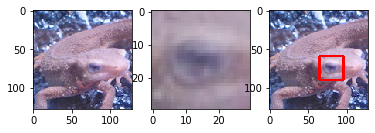

In [7]:
#55
def sad(img, tmp):
    img = img.astype(np.float32)
    tmp = tmp.astype(np.float32)
    H, W, C = img.shape
    h, w, c = tmp.shape
    s_min = h * w * c * 255
    y, x = -1, -1
    for i in range(H-h+1):
        for j in range(W-w+1):
            s = np.sum(np.abs(img[i:i+h, j:j+w]-tmp))
            if s < s_min:
                s_min = s
                y, x = i, j
    
    out = img.copy()
    cv2.rectangle(out, (x, y), (x+w+1, y+h+1), (255, 0, 0), 2)
    out = out.astype(np.uint8)
    return out

img = cv2.imread('imori.jpg')[..., ::-1]
tmp = cv2.imread('imori_part.jpg')[..., ::-1]

out = sad(img, tmp)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(tmp)
plt.subplot(1, 3, 3)
plt.imshow(out)
plt.show()

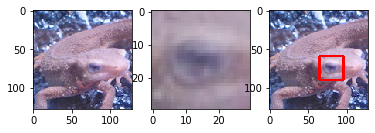

In [13]:
#56
def ncc(img, tmp):
    img = img.astype(np.float32)
    tmp = tmp.astype(np.float32)
    H, W, C = img.shape
    h, w, c = tmp.shape
    s_max = -1
    y, x = -1, -1
    for i in range(H-h+1):
        for j in range(W-w+1):
            num = np.sum(img[i:i+h, j:j+w] * tmp)
            den = np.sqrt(np.sum(img[i:i+h, j:j+w]**2)) * np.sqrt(np.sum(tmp**2))
            s = num / den
            if s > s_max:
                s_max = s
                y, x = i, j
    
    out = img.copy()
    cv2.rectangle(out, (x, y), (x+w+1, y+h+1), (255, 0, 0), 2)
    out = out.astype(np.uint8)
    return out

img = cv2.imread('imori.jpg')[..., ::-1]
tmp = cv2.imread('imori_part.jpg')[..., ::-1]

out = ncc(img, tmp)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(tmp)
plt.subplot(1, 3, 3)
plt.imshow(out)
plt.show()

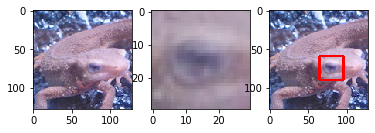

In [20]:
#57
def zncc(img, tmp):
    img = img.astype(np.float32)
    tmp = tmp.astype(np.float32)
    H, W, C = img.shape
    h, w, c = tmp.shape
    s_max = -1
    y, x = -1, -1
    mi, mt = [], []
    for i in range(c):
        mi.append(np.mean(img[..., i]))
        mt.append(np.mean(tmp[..., i]))  
    
    for i in range(H-h+1):
        for j in range(W-w+1):
            s = 0
            for k in range(c):
                num = np.sum((img[i:i+h, j:j+w, k] - mi[k]) * (tmp[..., k] - mt[k]))
                den = np.sqrt(np.sum((img[i:i+h, j:j+w, k] - mi[k])**2)) * np.sqrt(np.sum((tmp[..., k] - mt[k])**2))
                s += num / den
            if s > s_max:
                s_max = s
                y, x = i, j
    
    out = img.copy()
    cv2.rectangle(out, (x, y), (x+w+1, y+h+1), (255, 0, 0), 2)
    out = out.astype(np.uint8)
    return out

img = cv2.imread('imori.jpg')[..., ::-1]
tmp = cv2.imread('imori_part.jpg')[..., ::-1]

out = zncc(img, tmp)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(tmp)
plt.subplot(1, 3, 3)
plt.imshow(out)
plt.show()

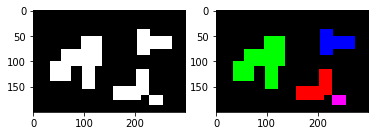

In [9]:
#58
def labeling4(img):
    h, w, c = img.shape
    _img = img.copy()
    label = _img[..., 0]
    
    table = [-1]
    cnt = 1
    for i in range(h):
        for j in range(w):
            if label[i, j] == 0:
                continue
            if i == 0 and j == 0:
                label[i, j] = cnt
                table.append(cnt)
                cnt += 1
                continue
            if i == 0:
                if label[i, j-1] == 0:
                    label[i, j] = cnt
                    table.append(cnt)
                    cnt += 1
                else:
                    label[i, j] = label[i, j-1]
                continue
            if j == 0:
                if label[i-1, j] == 0:
                    label[i, j] = cnt
                    table.append(cnt)
                    cnt += 1
                else:
                    label[i, j] = label[i-1, j]
                continue
            
            if label[i-1, j] == 0 and label[i, j-1] == 0:
                label[i, j] = cnt
                table.append(cnt)
                cnt += 1
                continue
            if label[i, j-1] == 0:
                label[i, j] = label[i-1, j]
                continue
            if label[i-1, j] == 0:
                label[i, j] = label[i, j-1]
                continue
            if label[i-1, j] <= label[i, j-1]:
                label[i, j] = label[i-1, j]
                table[label[i, j-1]] = table[label[i-1, j]]
                continue
            if label[i-1, j] > label[i, j-1]:
                label[i, j] = label[i, j-1]
                table[label[i-1, j]] = table[label[i, j-1]]
    
    out = img.copy()
    colors = [[], [0,0,255], [0,255,0], [0,255,255], [], [255,0,0], [], [255,0,255], [255,255,0]]
    for i in range(1, 8):
        idx = np.where(label == i)
        out[idx] = colors[table[i]]
    
    return out


img = cv2.imread('seg.png')

out = labeling4(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out)
plt.show()

[-1, 1, 2, 2, 2, 5, 5]


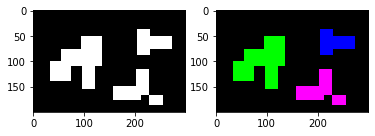

In [36]:
#59
def labeling8(img):
    h, w, c = img.shape
    _img = img.copy()
    label = _img[..., 0]
    
    k = np.array(((1, 1, 1),
                  (1, 0, 0),
                  (0, 0, 0)), dtype=np.int)
    table = [-1]
    cnt = 1
    a = 0
    for i in range(h):
        for j in range(w):
            if label[i, j] == 0:
                a+=1
                continue
            if i == 0 and j == 0:
                label[i, j] = cnt
                table.append(cnt)
                cnt += 1
                continue
            if i == 0:
                if label[i, j-1] == 0:
                    label[i, j] = cnt
                    table.append(cnt)
                    cnt += 1
                else:
                    label[i, j] = label[i, j-1]
                continue
            if j == 0:
                tmp = label[i-1, j:j+2]
                tmp = tmp[tmp > 0]
                if len(tmp) == 0:
                    label[i, j] = cnt
                    table.append(cnt)
                    cnt += 1
                else:
                    mi = np.min(tmp)
                    label[i, j] = mi
                    ma = np.max(tmp)
                    table[ma] = table[mi]
                continue
                
            tmp = label[i-1:i+2, j-1:j+2] * k
            tmp = tmp[tmp > 0]
            if len(tmp) == 0:
                label[i, j] = cnt
                table.append(cnt)
                cnt += 1
            else:
                mi = np.min(tmp)
                label[i, j] = mi
                tmp = tmp[tmp > mi]
                for num in tmp:
                    table[num] = table[mi]
            
    print(table)
    
    out = img.copy()
    colors = [[], [0,0,255], [0,255,0], [0,255,255], [255,0,0], [255,0,255], [255,255,0], []]
    for i in range(1, len(table)):
        idx = np.where(label == i)
        out[idx] = colors[table[i]]
    
    return out


img = cv2.imread('seg.png')

out = labeling8(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out)
plt.show()

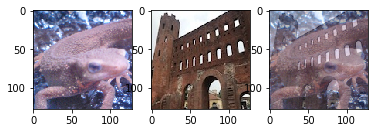

In [34]:
#60
def alphablend(_img1, _img2, alpha=0.6):
    img1, img2 = _img1.astype(np.float32), _img2.astype(np.float32)
    
    out = img1 * alpha + img2 * (1 - alpha)
    
    out = out.astype(np.uint8)
    return out


img1 = cv2.imread('imori_128.png')
img2 = cv2.imread('thorino.jpg')
img1 = img1[..., ::-1]
img2 = img2[..., ::-1]

out = alphablend(img1, img2)

plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.subplot(1, 3, 3)
plt.imshow(out)
plt.show()